In [1]:
#Sánchez García Fabricio Alejandro
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import timeit
import os 
import matplotlib.pyplot as plt
from numpy import sqrt, sin, cos, arange, pi, append, array, floor
from pylab import plot, xlabel, ylabel, title, show, axhline, savefig, subplots_adjust,\
        figure, xlim, rcParams, rc, rc_context, subplot, tight_layout, axvline, xlim, ylim, scatter


In [2]:
#Aquí definimos el tiempo de inicio
inicio = timeit.default_timer()

In [3]:
#Definimos una función para calcular las deriva en una posición determinada
# eta = (theta1, omega1, r1, v1, theta2, omega2, r2, v2) Son las variables
def f(eta):
    theta1 = eta[0]
    omega1 = eta[1]
    r1 = eta[2]
    v1 = eta[3]
    theta2 = eta[4]
    omega2 = eta[5]
    r2 = eta[6]
    v2 = eta[7]
    #Ocho ecuaciones diferenciales acopladas
    f_theta1 = omega1
    f_r1 = v1
    f_theta2 = omega2
    f_r2 = v2
   
    f_omega1 = (k2*(l2-r2)*sin(theta1-theta2) - 2*m1*v1*omega1\
                   - m1*g*sin(theta1)) / (m1*r1)
   
    f_v1 = (m1*g*cos(theta1) + k1*(l1-r1) - k2*(l2-r2)*cos(theta1-theta2)\
               + m1*r1*omega1**2) / m1
   
    f_omega2 = (-k1*(l1-r1)*sin(theta1-theta2) - 2*m1*v2*omega2) / (m1*r2)
   
    f_v2 = (k2*(m1+m2)*(l2-r2) + m1*m2*r2*omega2**2 -m2*k1*(l1-r1)*cos(theta1-theta2))/(m1*m2)
   
    return(array([f_theta1,f_omega1, f_r1, f_v1, \
                     f_theta2,f_omega2, f_r2, f_v2],float))

In [4]:
# definimos una función que toma ángulos iniciales y compresiones de resorte como
# parámetros y arreglo de salidas de ángulos y velocidades de ambas masas
def doblependulo(theta1_initial_deg, theta2_initial_deg, r1_initial, r2_initial):
    omega1_initial_deg = 0.0                    # Velocidad angular incial
    omega2_initial_deg = 0.0                    # Velocidad angular inicial
    theta1_initial = theta1_initial_deg*pi/180  # convierte el ángulo inicial a grados
    omega1_initial = omega1_initial_deg*pi/180  # convierte la velocidad angular inicial en grados
    theta2_initial = theta2_initial_deg*pi/180  # convierte el ángulo inicial a grados
    omega2_initial = omega2_initial_deg*pi/180  # convierte la velocidad angular inicial en gradoss
    v1_initial = 0.0                            # Valor inciial de v_1 (r1 punto) 
    v2_initial = 0.0                            # Valor inciial de v_2 (r2 punto) 
   
    # Establecemos el intervalo que ocuparemos
    a = 0.0                                 # Inicio
    b = 80.0                                # Final
    dt = 0.003                              # Tiempo de salto
    t_points = arange(a,b,dt)               # arreglo de tiempos
   
   
    # Condiciones iniciales eta = (theta1, omega1, r1, v1, theta2, omega2, r2, v2)
    eta = array([theta1_initial, omega1_initial, r1_initial, v1_initial, \
                    theta2_initial, omega2_initial, r2_initial, v2_initial],float)
    # Aquí creamos unos conjuntos vacíos para actualizar con los valores que nos interesan, luego aplicamos Runge-Kutta orden 4
    theta1_points = []
    omega1_points = []
    r1_points = []
    v1_points = []
    theta2_points = []
    omega2_points = []
    r2_points = []
    v2_points = []
    energy_points = []
    for t in t_points:
   
        theta1_points.append(eta[0])
        omega1_points.append(eta[1])
        r1_points.append(eta[2])
        v1_points.append(eta[3])
        theta2_points.append(eta[4])
        omega2_points.append(eta[5])
        r2_points.append(eta[6])
        v2_points.append(eta[7])
        E_1 = 0.5*m1*(eta[3]**2 + eta[2]**2 * eta[1]**2) + 0.5*k1*(l1-eta[2])**2 \
                    - m1*g*eta[2]*cos(eta[0])
        E_2 = 0.5*m2*(eta[3]**2 + eta[7]**2) + m2*(-sin(eta[0]-eta[4])*eta[2]*eta[7]*eta[1] \
                       + eta[2]**2 * eta[1]**2 + cos(eta[0]-eta[4])*eta[2]*eta[6]*eta[1]*eta[5] \
                       + 0.5*eta[6]**2 * eta[5]**2 + eta[3]*(cos(eta[0]-eta[4])*eta[7] \
                       + sin(eta[0]-eta[4])*eta[6]*eta[5])) + 0.5*k2*(l2-eta[6])**2 \
                       - m2*g*(cos(eta[0])*eta[2] + cos(eta[4])*eta[6])
        E_net = E_1 + E_2
        energy_points.append(E_net)
   
        kutta1 = dt*f(eta)
        kutta2 = dt*f(eta + 0.5*kutta1)
        kutta3 = dt*f(eta + 0.5*kutta2)
        kutta4 = dt*f(eta + kutta3)
        eta += (kutta1 + 2*kutta2 + 2*kutta3 + kutta4)/6
   
    return(theta1_points, omega1_points, r1_points, v1_points, \
              theta2_points, omega2_points, r2_points, v2_points, t_points, energy_points)

In [5]:
# Definimos los valores que queramos para el problema 
m1 = 5.00                                   # masa del péndulo 1
m2 = 3.50                                   # masa del péndulo 1
l1 = 0.85                                   # Longitud de equilibrio del resorte 1
l2 = 1.20                                   # Longitud de equilibrio del resorte 1
k1 = 80.0                                   # Constante k del resorte 1 
k2 = 90.0                                   # Constante k del resorte 2
g = 9.81                                    # Aceleración de la gravedad

In [6]:
# llama a la función y almacena las matrices de datos
theta1_points, omega1_points, r1_points, v1_points, theta2_points, omega2_points,\
        r2_points, v2_points, t_points, energy_points = doblependulo(170,105, l1*1.65, l2*1.95) 

In [7]:
# creamos listas de valores x e y para la masa 1 y la masa 2
x1_points = []
y1_points = []
x2_points = []
y2_points = []
for i in range(len(t_points)):
    x1_new = r1_points[i]*sin(theta1_points[i])
    y1_new = -r1_points[i]*cos(theta1_points[i])
    x1_points.append(x1_new)
    y1_points.append(y1_new)
   
    x2_new = r1_points[i]*sin(theta1_points[i]) + r2_points[i]*sin(theta2_points[i])
    y2_new = -r1_points[i]*cos(theta1_points[i]) - r2_points[i]*cos(theta2_points[i])
    x2_points.append(x2_new)
    y2_points.append(y2_new)

Time:  2.1274363999982597


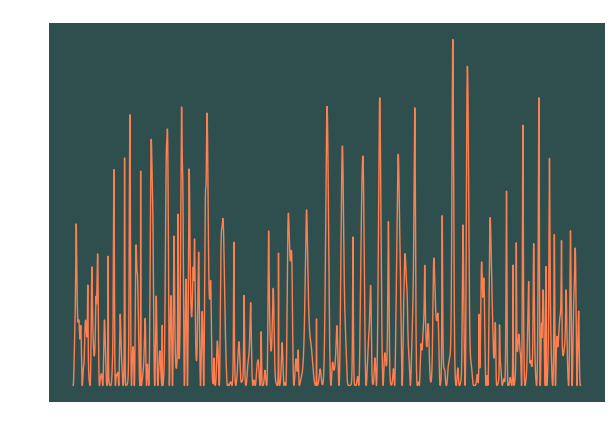

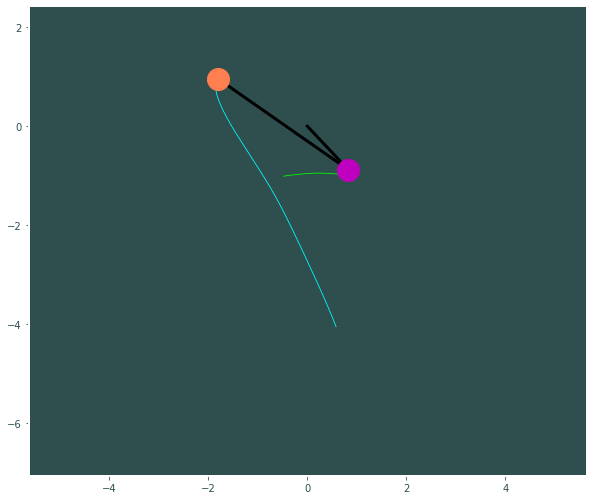

In [8]:
# Animaciones en camino... =D
# Opciones de estilo ¡estilooo ;D!
rcParams.update({'font.size': 18})
rc('axes', linewidth=2)
with rc_context({'axes.edgecolor':'white', 'xtick.color':'white', \
                'ytick.color':'white', 'figure.facecolor':'darkslategrey',\
                'axes.facecolor':'darkslategrey','axes.labelcolor':'white',\
                'axes.titlecolor':'white'}):
    # Gráfica de energía vs tiempo
    fig_E = figure(figsize=(10,7))
    ax_energy = subplot(1,1,1)
    title("Energía vs. Tiempo")
    xlabel("Tiempo (s)")
    ylabel("Energía (J)")
    ax_energy.plot(t_points,energy_points,color='coral',lw=1.4)
    output_directory = "./elasticDoublePendulumm/"
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    savefig(os.path.join(output_directory, "175_185_elasticDoublePend_energy_kutta003.png"))

    
    # Tiempo de ejecución del código
    stop = timeit.default_timer()
    print('Time: ', stop - inicio)
   
    # Configuramos la parte del péndulo
    fig = figure(figsize=(10,10))
   
    # Animación del péndulo
    ax_pend = subplot(1,1,1, aspect='equal')
    # get rid of axis ticks
    ax_pend.tick_params(axis='both', colors="darkslategrey")
   
   
   
    ### Aquí ya tenemos la animación como tal ###
    # creamos una lista para ingresar imágenes para cada paso de tiempo
    ims = []
    index = 0
    # Solo muestra los primeros 80 segundos aproximadamente en el gif.
    while index <= len(t_points)-1:
        ln1, = ax_pend.plot([0,r1_points[index]*sin(theta1_points[index])],\
                                    [0,-r1_points[index]*cos(theta1_points[index])],\
                            color='k',lw=3,zorder=99)
        bob1, = ax_pend.plot(r1_points[index]*sin(theta1_points[index]),\
                                    -r1_points[index]*cos(theta1_points[index]),'o',\
                                    markersize=22,color="m",zorder=100)
   
        ln2, = ax_pend.plot([r1_points[index]*sin(theta1_points[index]),\
                            r1_points[index]*sin(theta1_points[index])+\
                            r2_points[index]*sin(theta2_points[index])],\
                            [-r1_points[index]*cos(theta1_points[index]),\
                                -r1_points[index]*cos(theta1_points[index])\
                                -r2_points[index]*cos(theta2_points[index])], color='k',lw=3,zorder=99)
        bob2, = ax_pend.plot(r1_points[index]*sin(theta1_points[index])+\
                            r2_points[index]*sin(theta2_points[index]),\
                            -r1_points[index]*cos(theta1_points[index])\
                            -r2_points[index]*cos(theta2_points[index]),'o',\
                                    markersize=22,color="coral",zorder=100)
   
        if index > 200:
            trail1, = ax_pend.plot(x1_points[index-140:index],y1_points[index-140:index], \
                                color="lime",lw=0.8,zorder=20)
   
            trail2, = ax_pend.plot(x2_points[index-190:index],y2_points[index-190:index], \
                                color="cyan",lw=0.8,zorder=20)
   
        else:
            trail1, = ax_pend.plot(x1_points[:index],y1_points[:index], \
                                color="lime",lw=0.8,zorder=20)
   
            trail2, = ax_pend.plot(x2_points[:index],y2_points[:index], \
                                   color="cyan",lw=0.8,zorder=20)
        # Agrega frames a la lista ims
        ims.append([ln1, bob1, ln2, bob2, trail1, trail2])
   
        # Sólo se muestra cada 6 frames
        index += 6
    # Guardamos la animación y listo
    
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    writervideo = PillowWriter(fps=60)
    ani.save('./elasticDoublePendulumm/170_105_elasticDoublePend.gif', writer=writervideo)   
    